<h1>What is a notebook？</h1>
 
In the notebook, you can write and execute `Python code`, move the **data analysis work on the personal computer to the browser**, and at the same time:
- No need to deploy environment, and use stronger server resources than personal computer configuration
- Data query and notebook get through, no need to turn data multiple times
- Use Pandas, Matplotlib, TenSorFlow to complete data analysis and machine learning 
- Project collaboration: the same project includes data exploration, data development, and process modeling

Whether you are a **Python beginner**, **data analyst** or **data scientist**, notebook can help you complete data analysis tasks more easily. You can read the **Data Platform Help Document** for details, or check the getting started guide below!

## Getting started

The document you are reading is not a static web page, but an interactive environment that allows you to **write and execute code**, called **notebook**.

For example, the following `Code Cell` will output today's date, just like operating in the Python IDE.

In [1]:
import time
today = time.strftime("%Y%m%d", time.localtime())
print(today)

20200605


To execute the code in the above cell, click the run button on the left (shortcut key `Shift+Enter`).

Of course, you can complete a simple calculation, such as approximately how many days in a lifetime

In [2]:
days_in_a_life= 365 * 80

days_in_a_life

29200

About how many hours in a lifetime

> In the same notebook, you can reference variables

In [3]:
hours_in_a_life = 24 * days_in_a_life

hours_in_a_life

700800

You can combine **executable code**, **rich text**, and **images**, **HTML**, **LaTeX**, etc., into one document.

You can use your notebook for data exploration under your personal, or you can edit your notebook under the project and collaborate with project members.

The notebook are based on the [Jupyter](https://www.jupyter.org/) solution.

Next, let's look at how to load the data of the result data table in the notebook.


## Retrieve data
### Use SQL query in cell
> Support to refer to the `variable` defined by the previous `Cell` in `Cell`

In [4]:
%%bksql 
SELECT status, body_bytes_sent, http_referer, method, URI, dtEventTime
       FROM 591_demo_nginx_access_log
       WHERE thedate={today}
    ORDER BY dtEventTime DESC LIMIT 3

#### Quoting query results
After executing the query statement, the query result set supports assignment to custom variables

In [5]:
result = _

The custom variable `result` contains methods such as `dicts`, `DataFrame`, etc. to facilitate secondary processing of the result set

In [6]:
for line in result.data:
  print(line)

{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:33', 'URI': '/portal', 'status': 301}
{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:32', 'URI': '/portal', 'status': 301}
{'method': 'GET', 'http_referer': '-', 'body_bytes_sent': 185, 'dtEventTime': '2020-06-05 20:40:32', 'URI': '/portal', 'status': 301}


In [7]:
df = result.DataFrame()
df.columns

Index(['status', 'body_bytes_sent', 'http_referer', 'method', 'URI',
       'dtEventTime'],
      dtype='object')

Of course, you can use `single-row SQL query` to assign the query result to a variable.

In [8]:
uri_group_result = %bksql SELECT URI, COUNT(*) AS cnt FROM 591_demo_nginx_access_log.hdfs WHERE thedate=current_date() GROUP BY URI ORDER BY cnt DESC LIMIT 10 

uri_group_result

### Reference query result set in data exploration

The query result set of the data exploration query task can be used directly in the notebook, method: datasets('query_task_name')

In [9]:
day_pv_last_week = datasets('query_1')

day_pv_last_week

## Data science

With the help of notebook, you can take advantage of the power of commonly used Python libraries to analyze and visualize data. The following `Code Cell` uses `NumPy` to generate some random data, and uses `Matplotlib` to visualize these data. To modify the code, just click on `Cell` and start to modify.

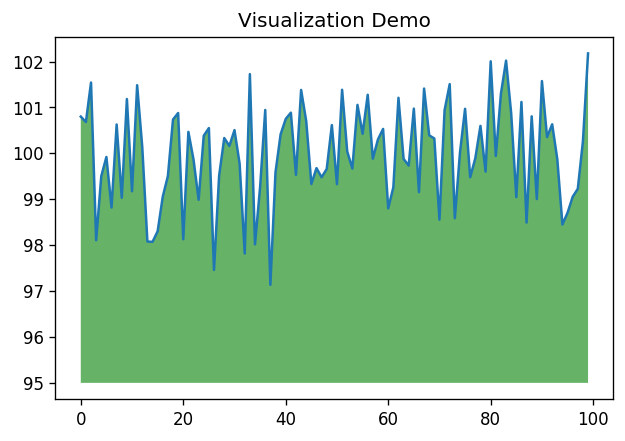

In [10]:
import numpy as np
from matplotlib import pyplot as plt

ys = 100 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 95, where=(ys > 95), facecolor='g', alpha=0.6)

plt.title("Visualization Demo")
plt.show()

## Machine learning

With the help of notebook, you can use machine learning libraries such as `sklearn` and `tensorflow` to complete machine learning training.